In [2]:
from qiskit import QuantumCircuit

In [3]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
circ.measure(1,1)
circ.measure(0,0)
circ.draw()

┌───┐        ┌─┐
q_0: ┤ H ├──■─────┤M├
     └───┘┌─┴─┐┌─┐└╥┘
q_1: ─────┤ X ├┤M├─╫─
          └───┘└╥┘ ║ 
c: 2/═══════════╩══╩═
                1  0

In [4]:
from qiskit import Aer
from qiskit import assemble

In [5]:
symulator = Aer.get_backend('qasm_simulator')
qobj = assemble(circ, shots=1000)
wyniki = symulator.run(qobj)

In [6]:
hist = wyniki.result().get_counts()
print(hist)

{'11': 515, '00': 485}


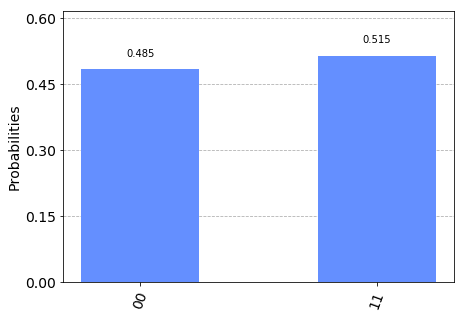

In [7]:
from qiskit.visualization import plot_histogram

plot_histogram(hist)

In [8]:
# Dodawanie modulo 4

circ2 = QuantumCircuit(2,2)

circ2.x(0)
circ2.x(1)

circ2.barrier()

circ2.x(0)
circ2.barrier()

circ2.measure(0,0)
circ2.measure(1,1)

circ2.draw()

┌───┐ ░ ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─┤ X ├─░─┤M├───
     ├───┤ ░ └───┘ ░ └╥┘┌─┐
q_1: ┤ X ├─░───────░──╫─┤M├
     └───┘ ░       ░  ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1

In [9]:
symulator2 = Aer.get_backend('qasm_simulator')
qobj2 = assemble(circ2, shots=1000)
wyniki2 = symulator2.run(qobj2)

In [10]:
hist2 = wyniki2.result().get_counts()
print(hist2)

{'10': 1000}


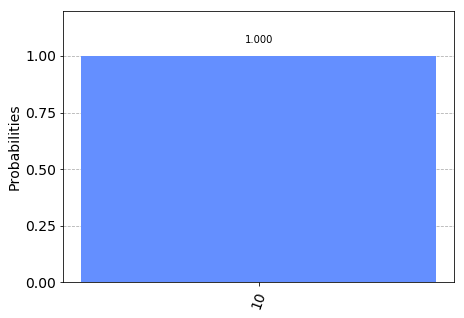

In [11]:
from qiskit.visualization import plot_histogram

plot_histogram(hist2)

In [12]:
#Half adder (półsumator)

circsum = QuantumCircuit(3,2)

# Inputs - stariting are 0,0

circsum.x(0)
circsum.x(1)

circsum.barrier()

circsum.ccx(0,1,2)
circsum.cx(0,1)

circsum.barrier()

circsum.measure(1,1)
circsum.measure(2,0)

circsum.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────■───░───────
     ├───┤ ░   │  ┌─┴─┐ ░ ┌─┐   
q_1: ┤ X ├─░───■──┤ X ├─░─┤M├───
     └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_2: ──────░─┤ X ├──────░──╫─┤M├
           ░ └───┘      ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           1  0

In [13]:
symulator2 = Aer.get_backend('qasm_simulator')
qobj2 = assemble(circsum, shots=1000)
wyniki2 = symulator2.run(qobj2)

{'01': 1000}


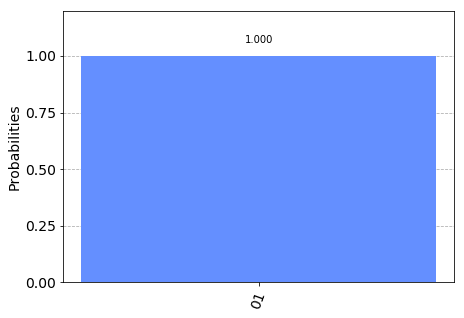

In [14]:
hist2 = wyniki2.result().get_counts()
print(hist2)

plot_histogram(hist2)

In [15]:
#Sumator

circsum = QuantumCircuit(4,2)

# Inputs - stariting are 0,0

circsum.x(0)
# circsum.x(1)

circsum.barrier()

circsum.ccx(0,1,3)
circsum.cx(0,1)
circsum.ccx(1,2,3)
circsum.cx(1,2)
circsum.cx(0,1)

circsum.barrier()

circsum.measure(2,1)
circsum.measure(3,0)

circsum.draw()

┌───┐ ░                           ░       
q_0: ┤ X ├─░───■────■──────────────■───░───────
     └───┘ ░   │  ┌─┴─┐          ┌─┴─┐ ░       
q_1: ──────░───■──┤ X ├──■────■──┤ X ├─░───────
           ░   │  └───┘  │  ┌─┴─┐└───┘ ░ ┌─┐   
q_2: ──────░───┼─────────■──┤ X ├──────░─┤M├───
           ░ ┌─┴─┐     ┌─┴─┐└───┘      ░ └╥┘┌─┐
q_3: ──────░─┤ X ├─────┤ X ├───────────░──╫─┤M├
           ░ └───┘     └───┘           ░  ║ └╥┘
c: 2/═════════════════════════════════════╩══╩═
                                          1  0

{'10': 1000}


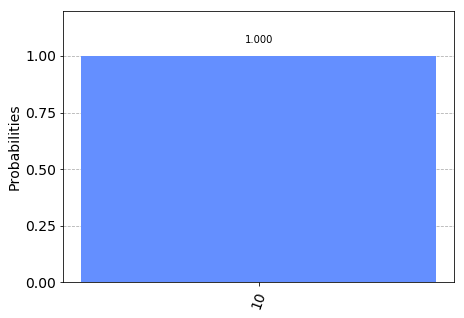

In [16]:
symulator2 = Aer.get_backend('qasm_simulator')
qobj2 = assemble(circsum, shots=1000)
wyniki2 = symulator2.run(qobj2)

hist2 = wyniki2.result().get_counts()
# hist_label = wyniki2.result().get_labels()
print(hist2)

plot_histogram(hist2)

In [17]:
#Teleportacja kwantowa

circsum = QuantumCircuit(4,2)

# Inputs - stariting are 0,0

circsum.x(0)
# circsum.x(1)

circsum.barrier()

circsum.h(1)
circsum.cx(1,2)
circsum.cx(0,1)
circsum.cx(0,1)

circsum.barrier()

circsum.measure(2,1)
circsum.measure(3,0)

circsum.draw()

┌───┐ ░                      ░       
q_0: ┤ X ├─░─────────────■────■───░───────
     └───┘ ░ ┌───┐     ┌─┴─┐┌─┴─┐ ░       
q_1: ──────░─┤ H ├──■──┤ X ├┤ X ├─░───────
           ░ └───┘┌─┴─┐└───┘└───┘ ░ ┌─┐   
q_2: ──────░──────┤ X ├───────────░─┤M├───
           ░      └───┘           ░ └╥┘┌─┐
q_3: ──────░──────────────────────░──╫─┤M├
           ░                      ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     1  0